In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv 
import seaborn as sns

In [18]:
data = pd.read_csv('newdata.csv')
data.head()

,инн,год,оценка,дата_регистрации,статус,нематериальные_активы,результаты_исследований_и_разработок,нематериальные_поисковые_активы,материальные_поисковые_активы,основные_средства,...,прибыль_(убыток)_до_налогообложения,текущий_налог_на_прибыль,постоянные_налоговые_обязательства_(активы),изменение_отложенных_налоговых_обязательств,изменение_отложенных_налоговых_активов,прочее,чистая_прибыль_(убыток),"результат_от_переоценки_внеоборотных_активов,_не_включаемый_в_чистую_прибыль_(убыток)_периода","результат_от_прочих_операций,_не_включаемый_в_чистую_прибыль_(убыток)_периода",совокупный_финансовый_результат_периода
0,3525165706,2018,низкий,16.05.2006,Действующее,0.0,0.0,0.0,0.0,689000.0,...,-32248000.0,0.0,0.0,0.0,0.0,0.0,-32248000.0,0.0,0.0,-32248000.0
1,3525165706,2017,низкий,16.05.2006,Действующее,0.0,0.0,0.0,0.0,689000.0,...,-294245000.0,0.0,0.0,0.0,0.0,0.0,-294245000.0,0.0,0.0,-294245000.0
2,3525165706,2016,низкий,16.05.2006,Действующее,0.0,0.0,0.0,0.0,689000.0,...,-59776000.0,0.0,0.0,0.0,0.0,0.0,-59776000.0,0.0,0.0,-59776000.0
3,6670142587,2018,низкий,29.09.2006,Действующее,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6670142587,2017,низкий,29.09.2006,Действующее,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
maxx = []
minn = []
cols = []

data_main_params = ['инн,год'.split(',')]
data_num_params = [i for i in data.columns if i != 'инн' and i != 'год' and i!='оценка' and i!='дата_регистрации' and i!='статус']

for i in data_num_params:
    cols.append(i)
    maxx.append(max(data[i]))
    minn.append(min(data[i]))

l_max = dict(zip(cols,maxx))
l_min = dict(zip(cols,minn))

dictt = {
    'max': l_max,
    'min': l_min
}
# for i in range(len(n)):
#     print(n[i],': ',d[i])
df = pd.DataFrame(dictt)
print(df)

max           min
нематериальные_активы                               4.459953e+10  0.000000e+00
результаты_исследований_и_разработок                6.728123e+09  0.000000e+00
нематериальные_поисковые_активы                     1.113030e+11  0.000000e+00
материальные_поисковые_активы                       2.617927e+10  0.000000e+00
основные_средства                                   5.159462e+12 -7.961600e+07
доходные_вложения_в_материальные_ценности           2.251450e+11  0.000000e+00
финансовые_вложения                                 6.159575e+12  0.000000e+00
отложенные_налоговые_активы                         9.506297e+10  0.000000e+00
прочие_внеоборотные_активы                          6.617300e+10  0.000000e+00
итого_по_разделу_i                                  7.726343e+12 -2.100000e+04
запасы                                              1.514262e+11 -1.183800e+07
налог_на_добавленную_стоимость_по_приобретенным...  7.271869e+10 -1.139600e+07
дебиторская_задолженность         

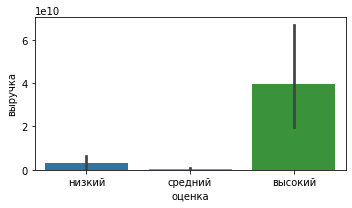

In [62]:
plt.figure(figsize=(5,3))
sns.barplot(x='оценка',y='выручка',data=data)
plt.tight_layout()

In [70]:
for i in data_num_params:
    plt.figure(figsize=(5,3))
    sns.barplot(x='оценка',y=i,data=data)
    plt.tight_layout()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

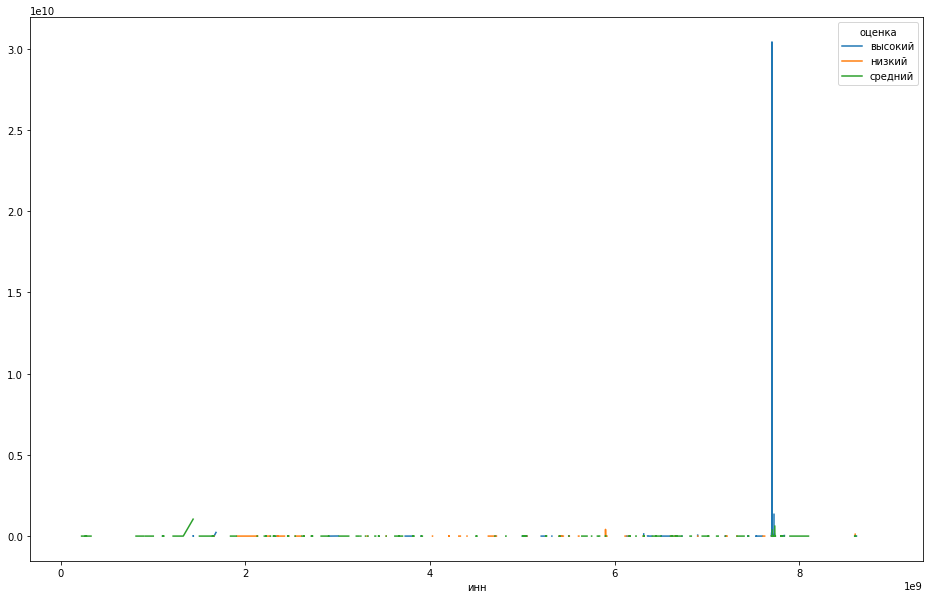

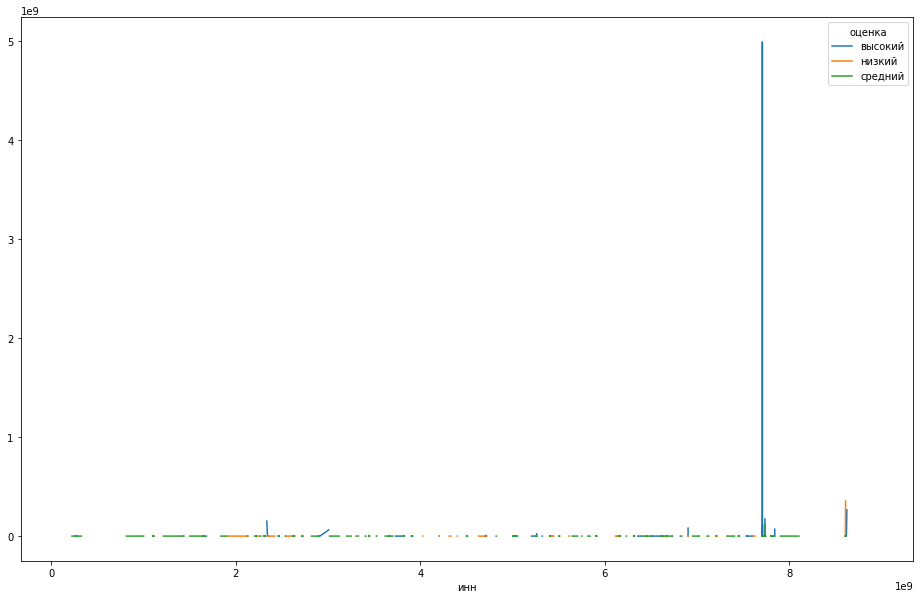

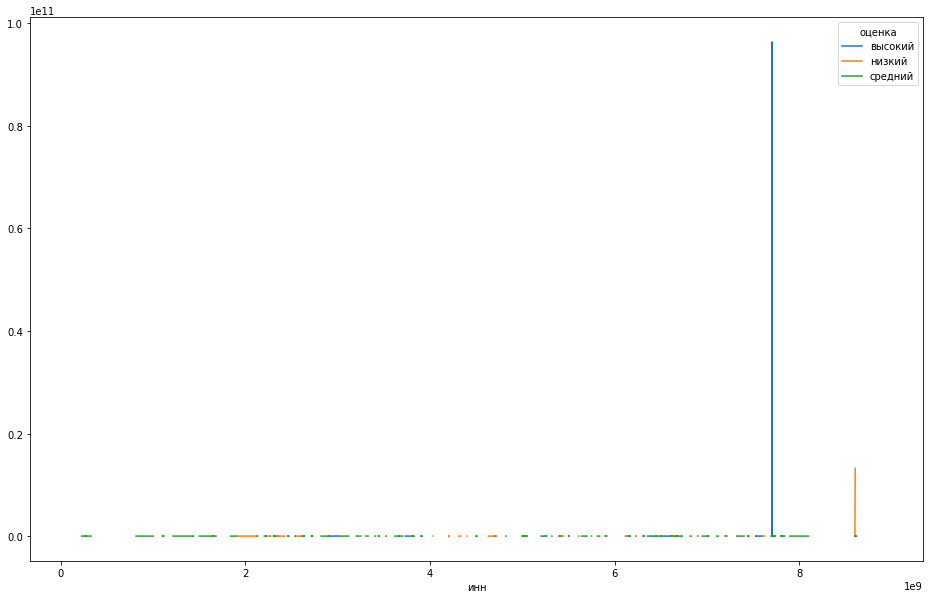

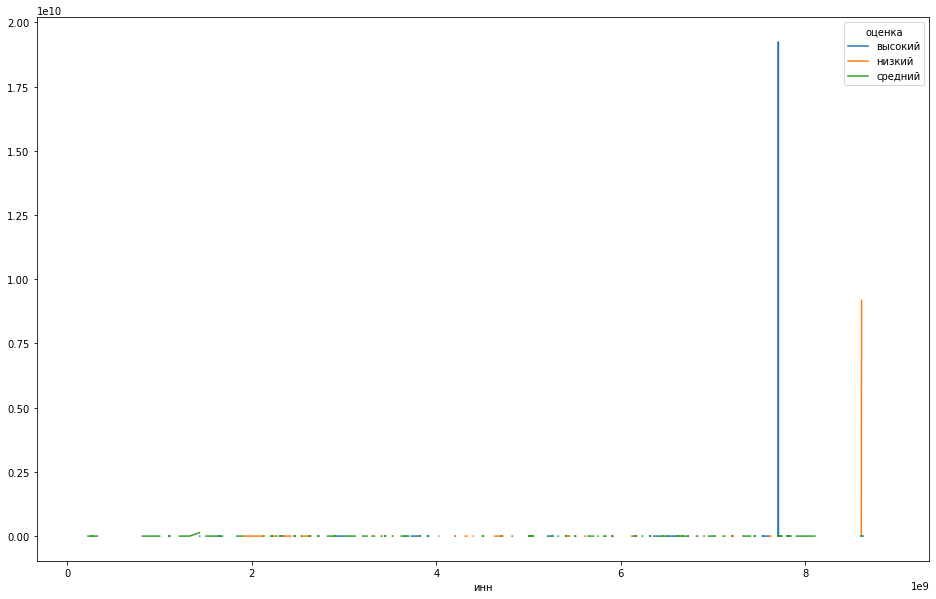

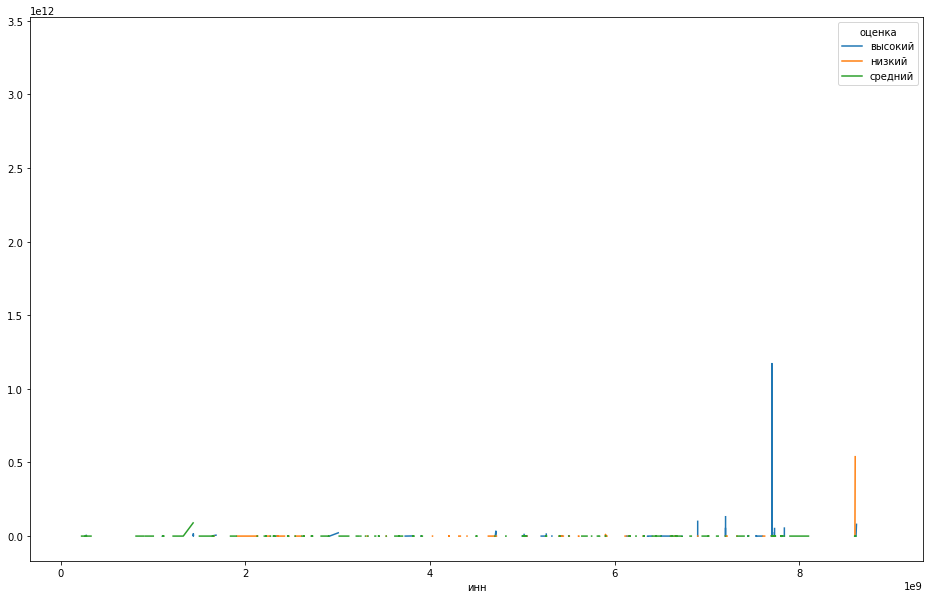

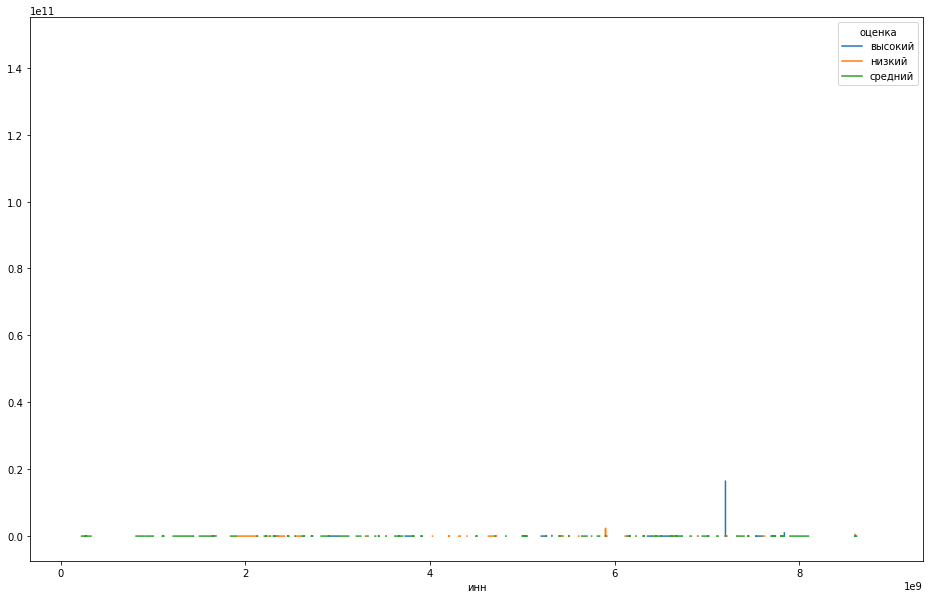

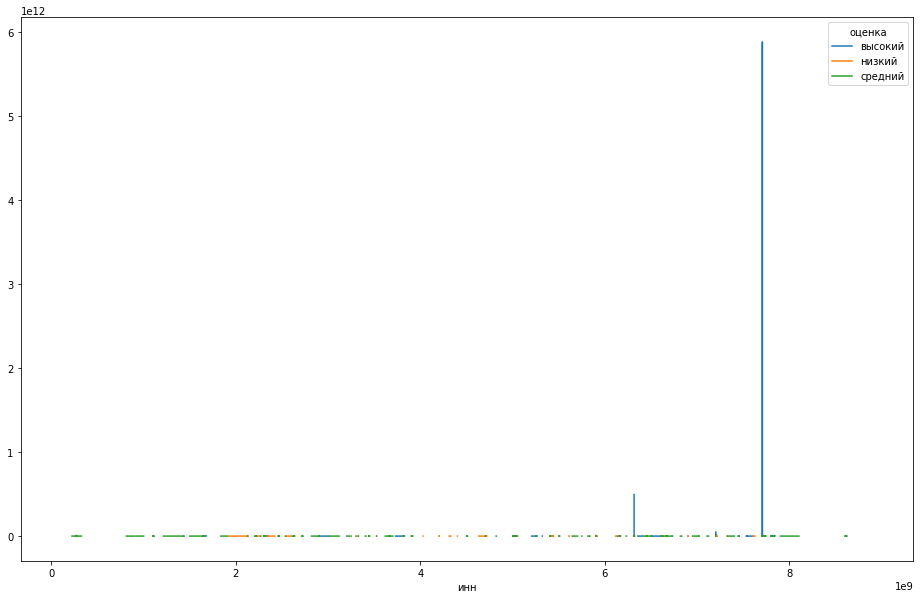

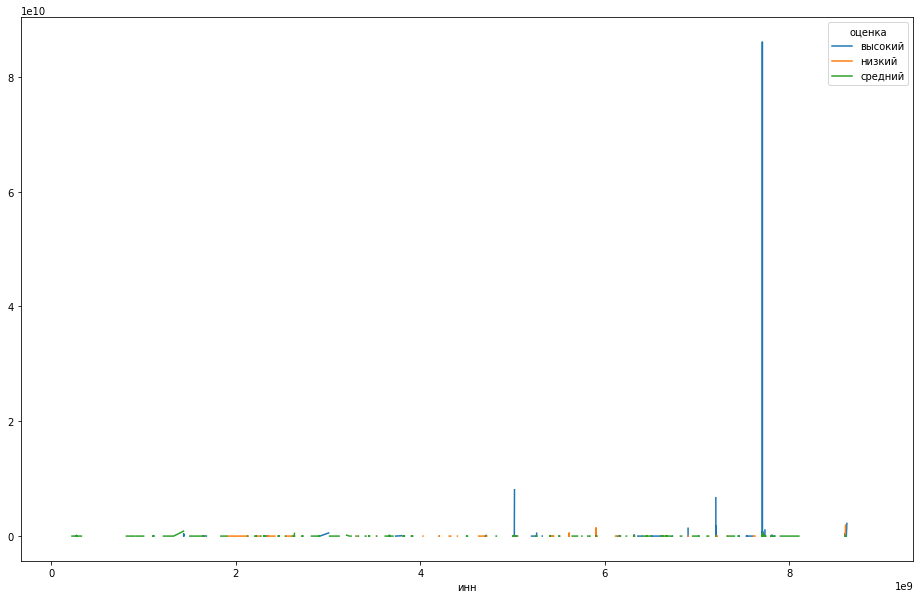

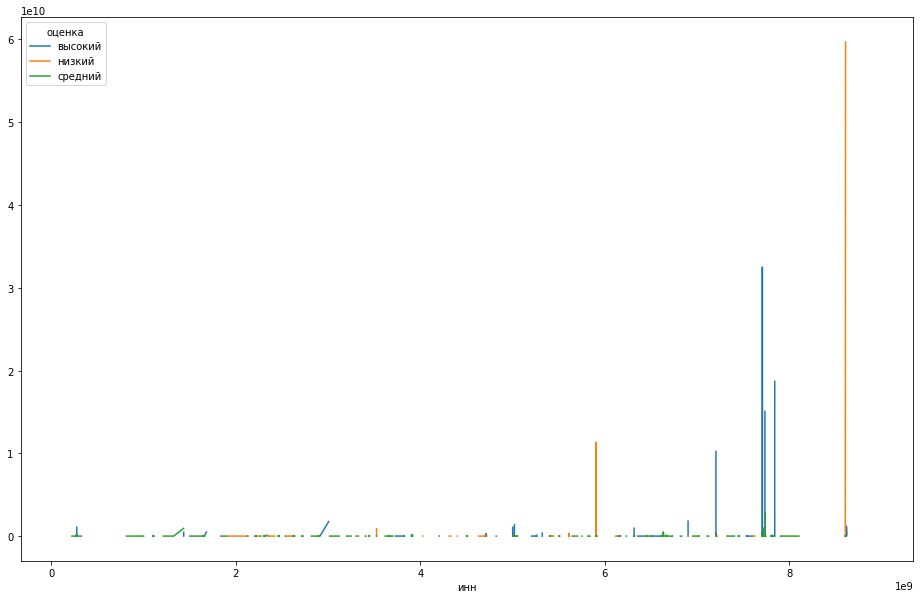

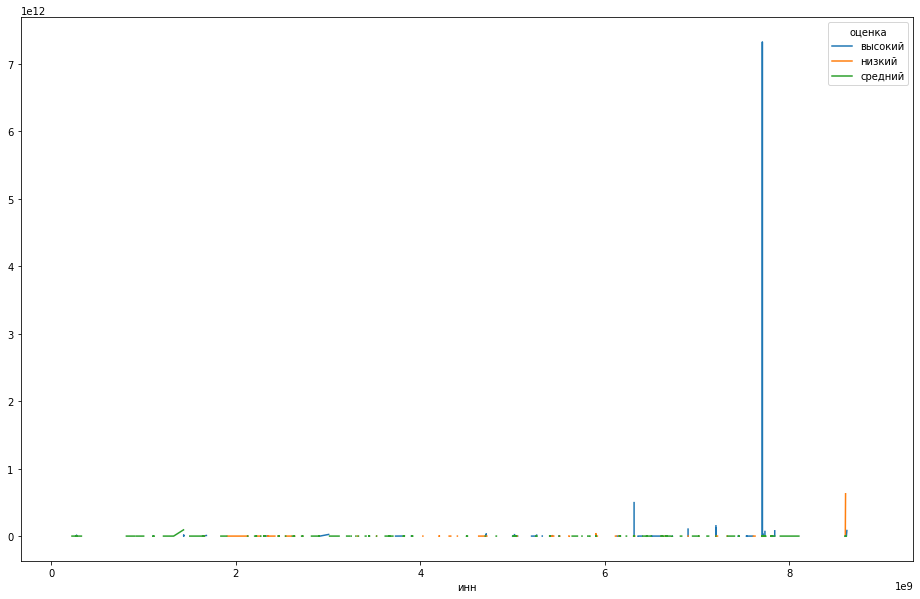

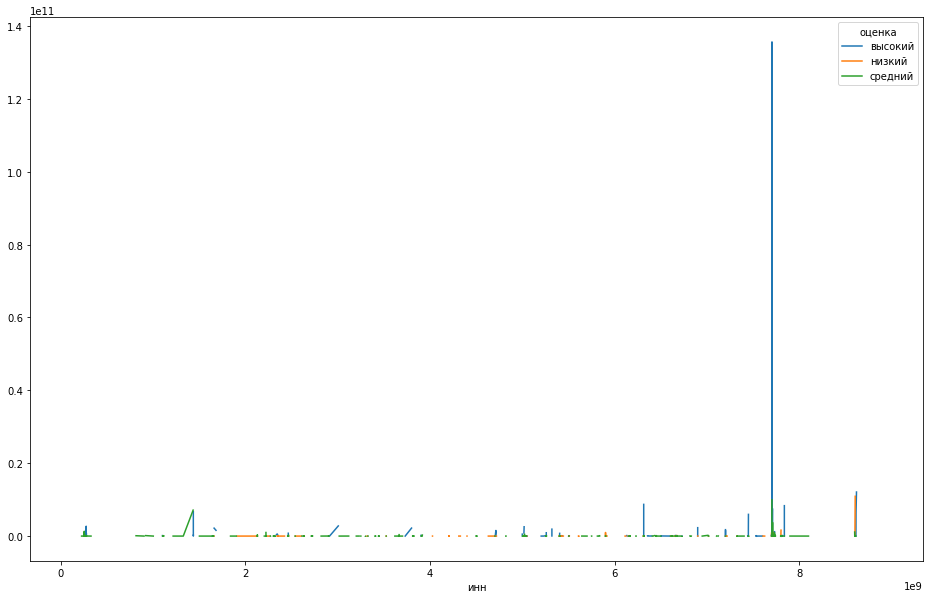

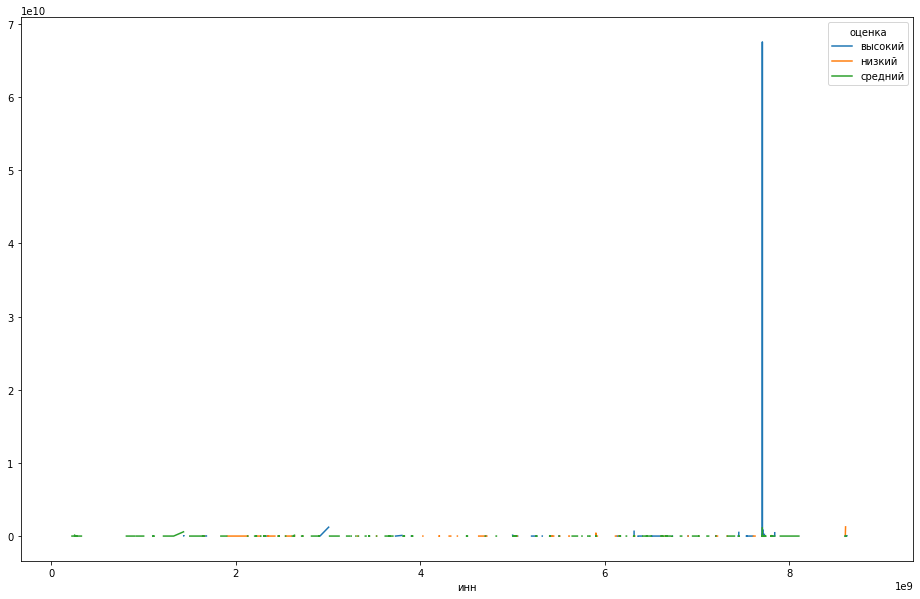

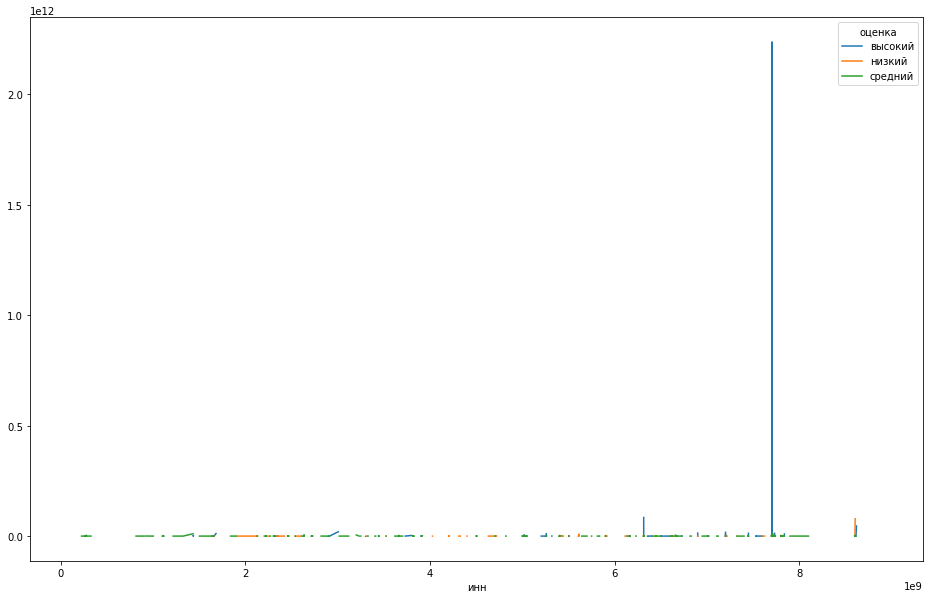

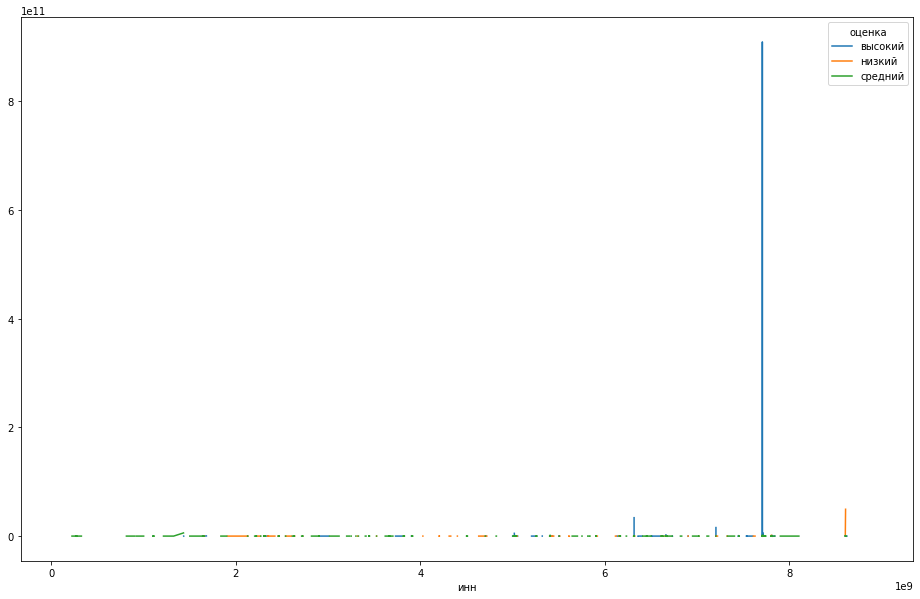

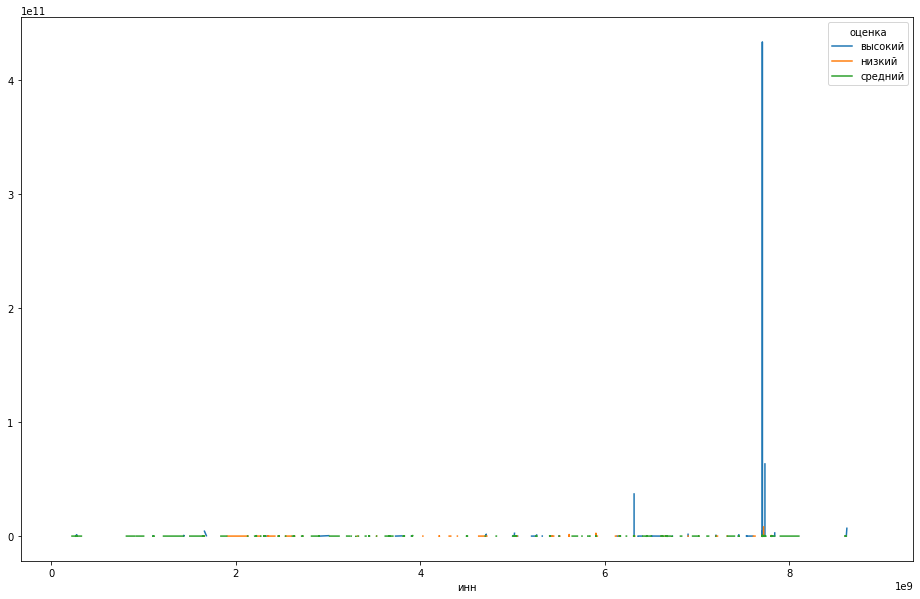

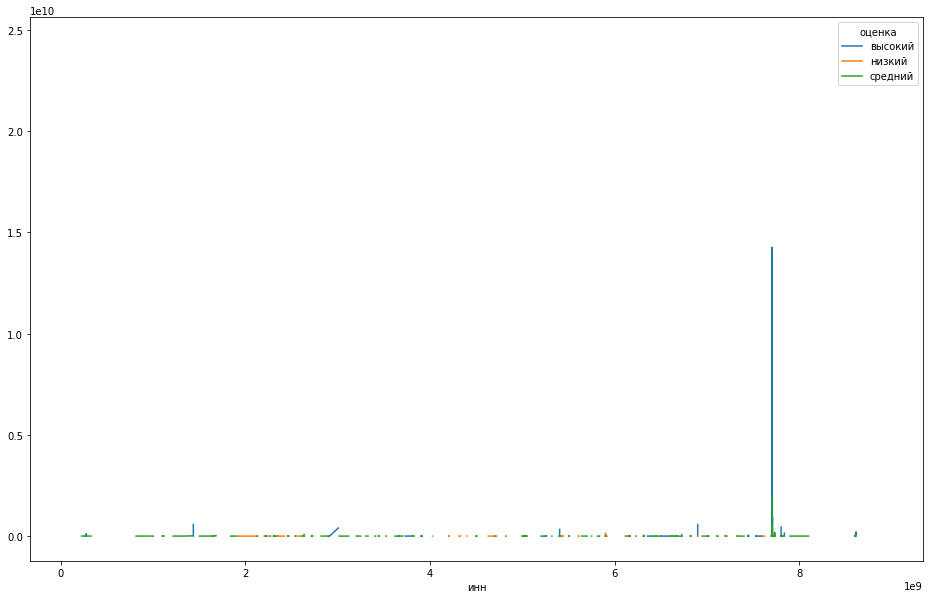

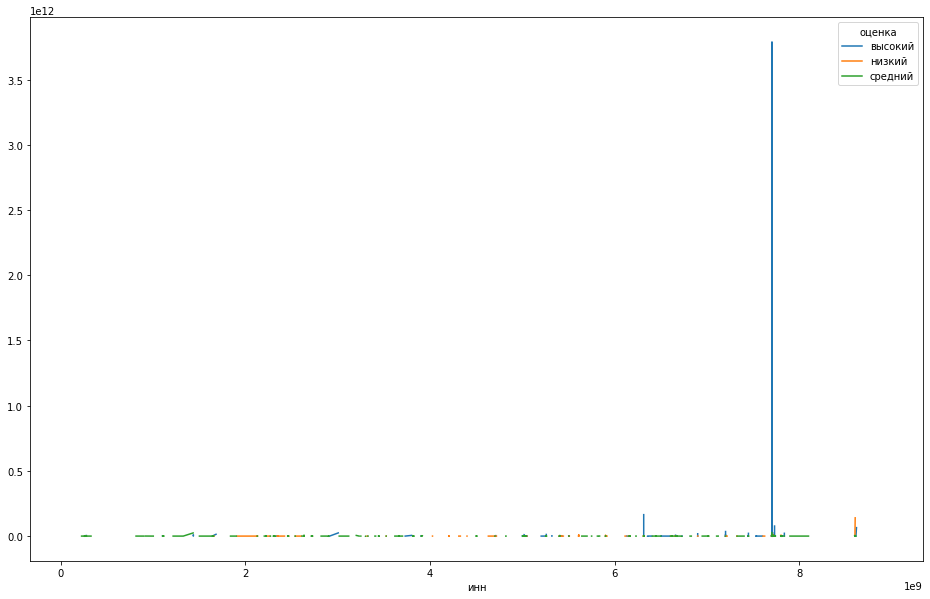

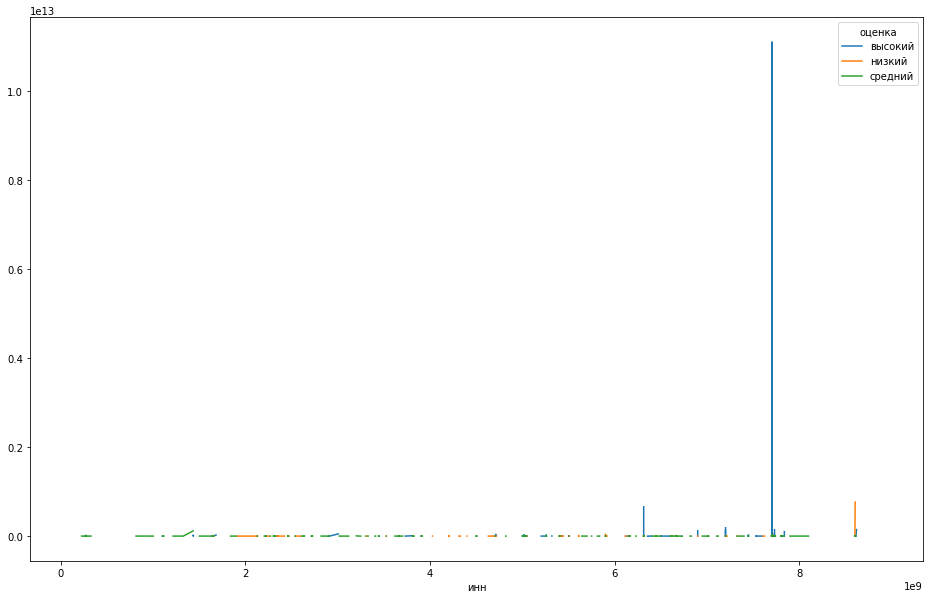

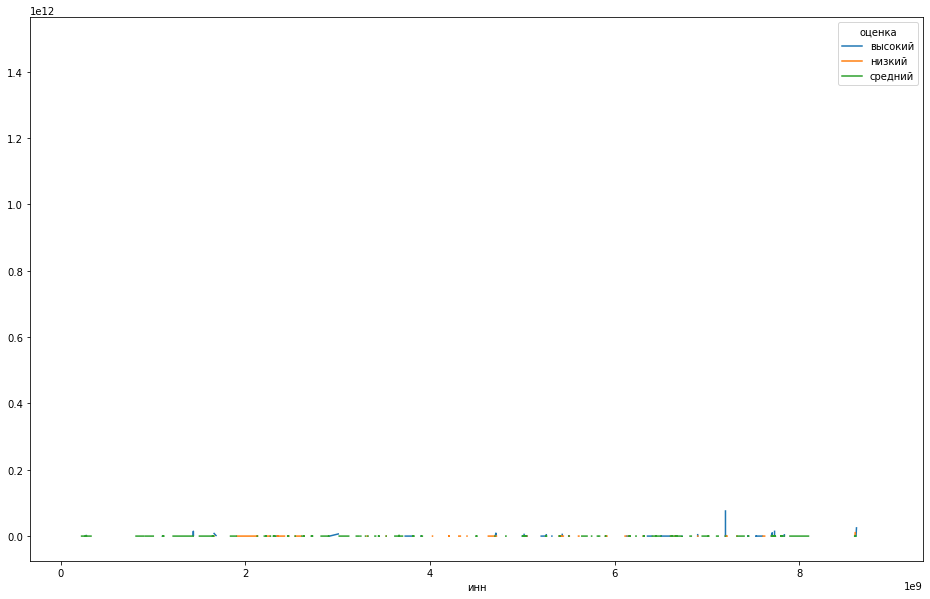

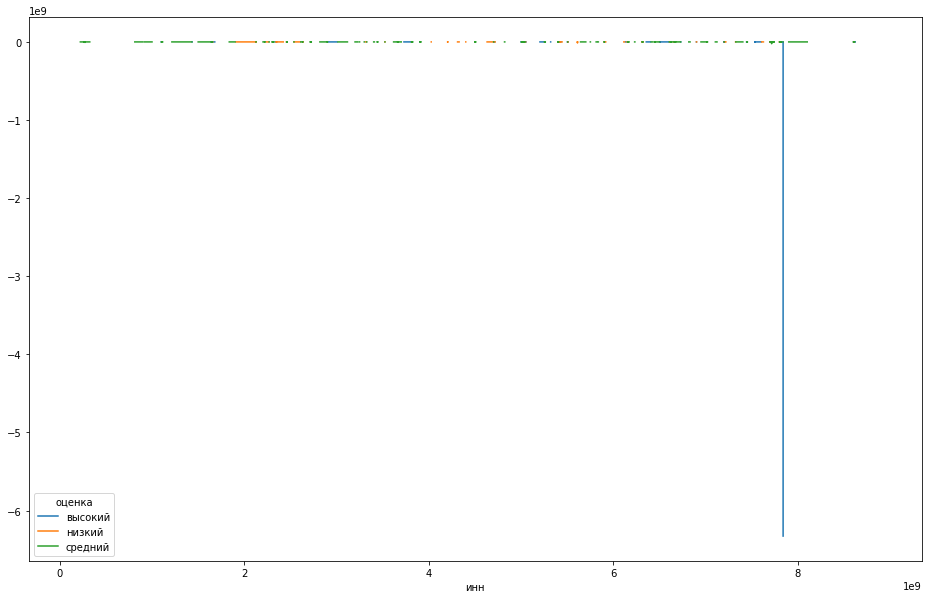

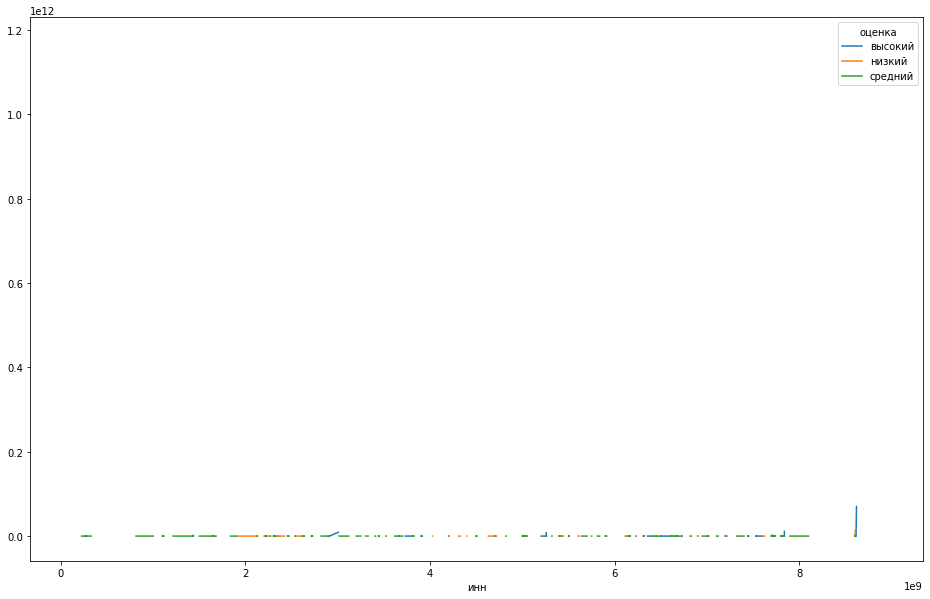

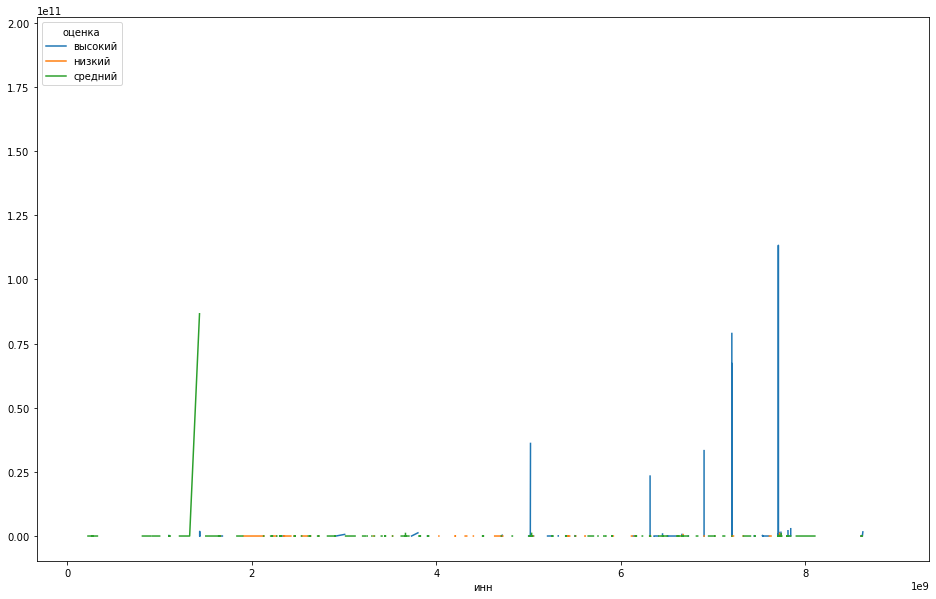

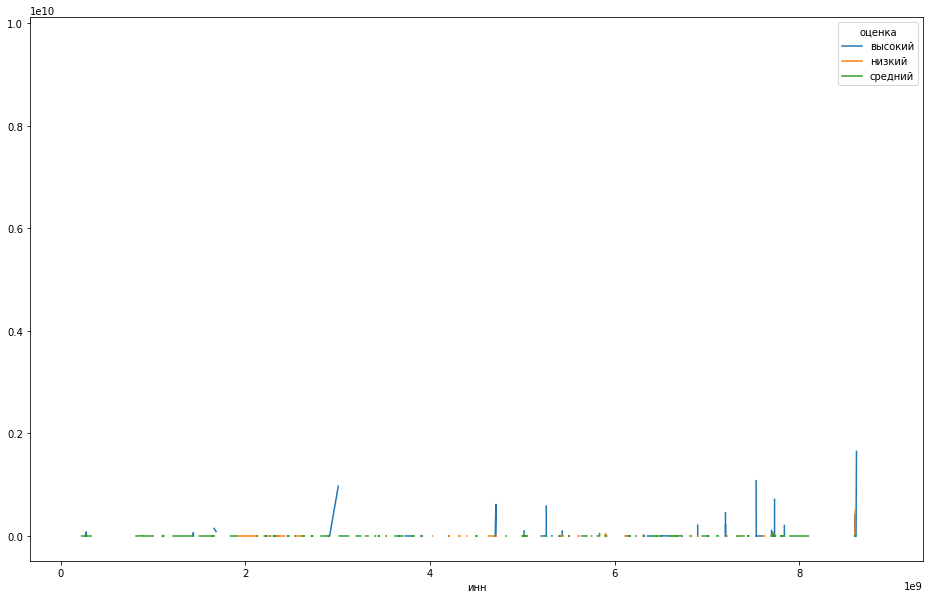

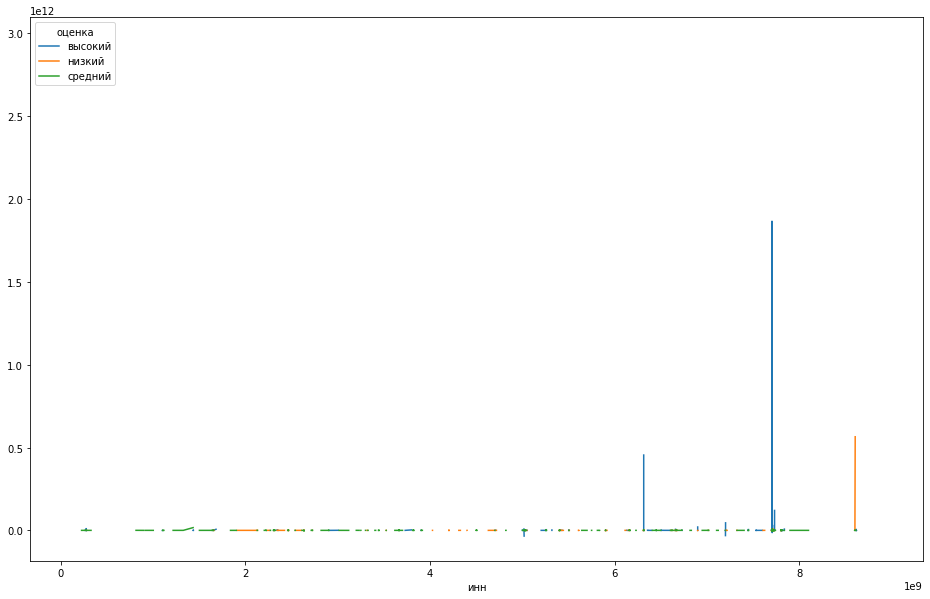

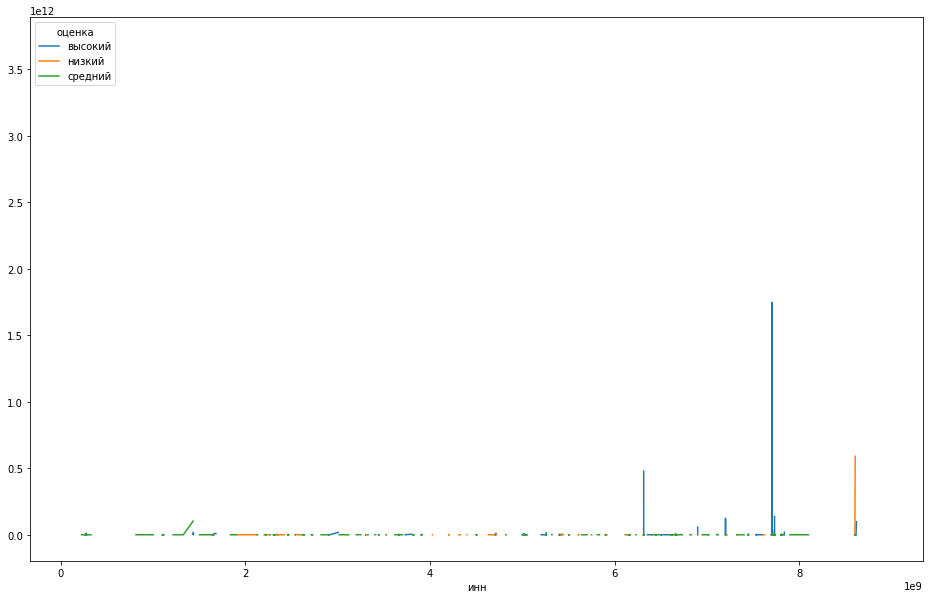

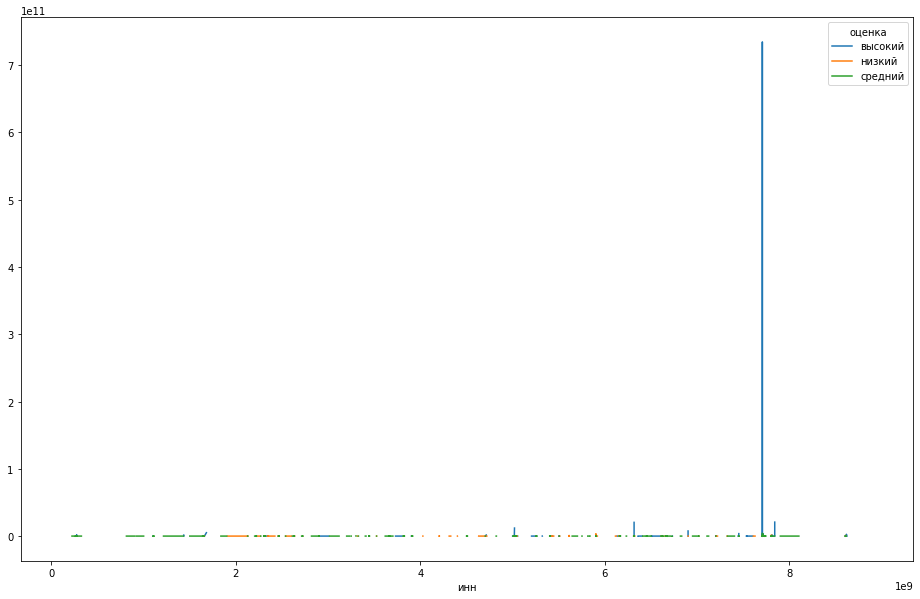

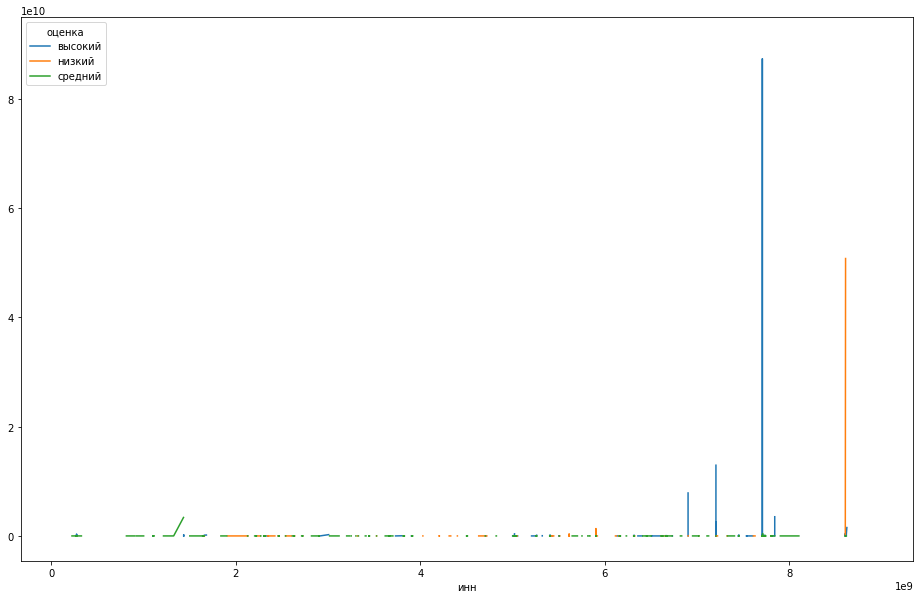

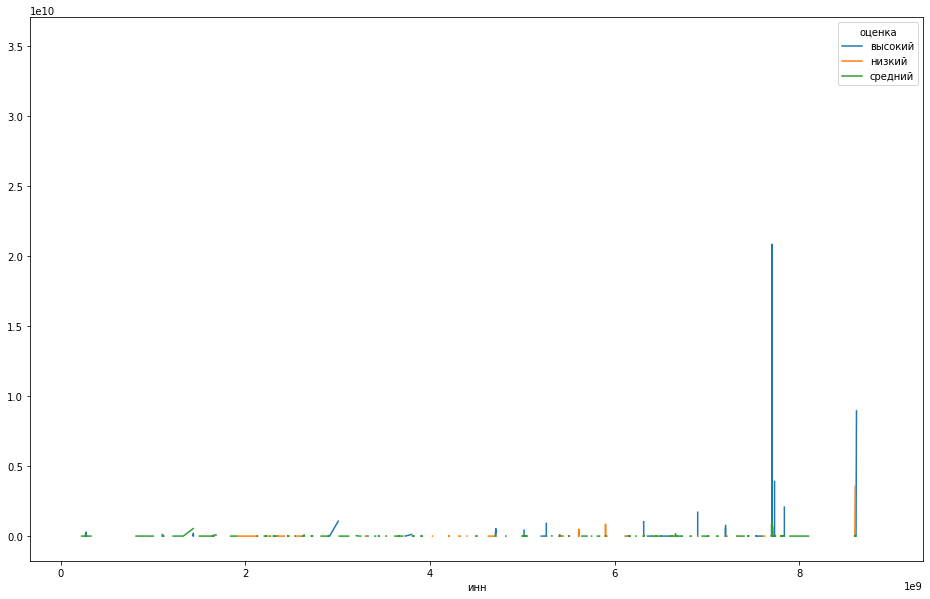

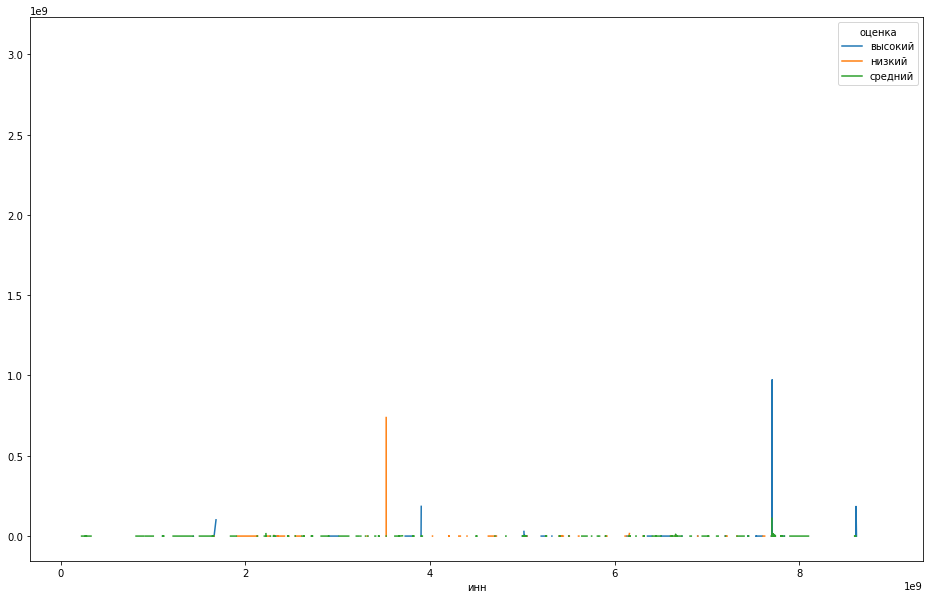

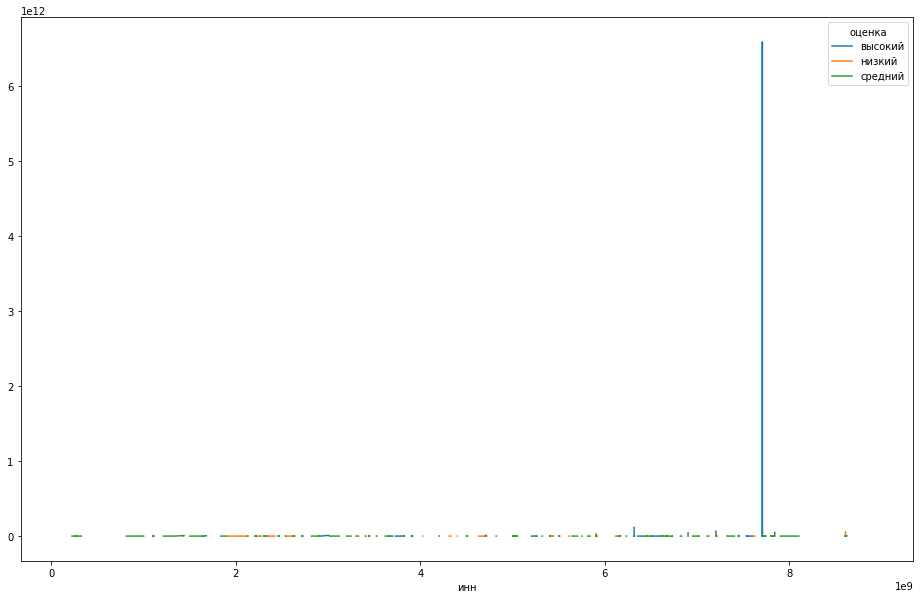

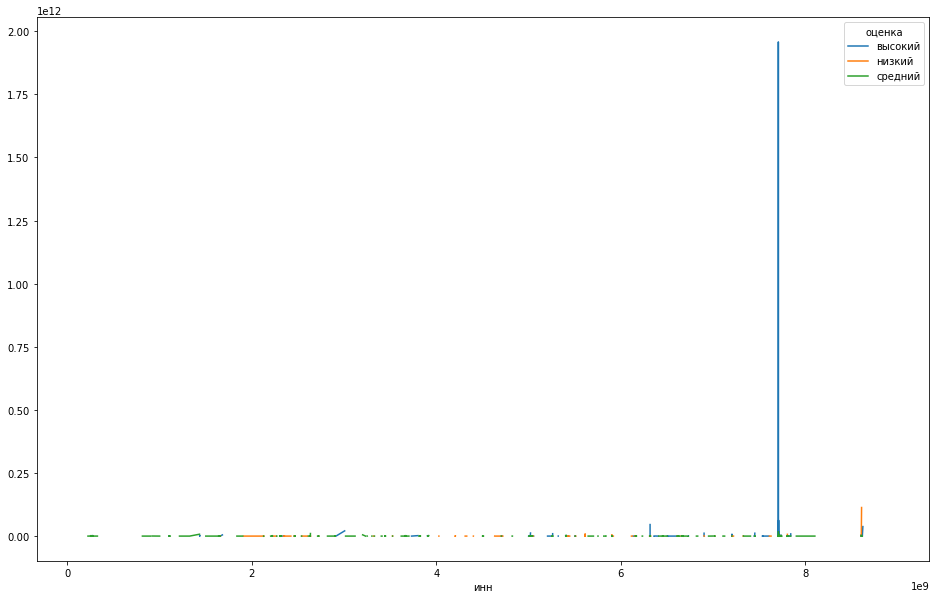

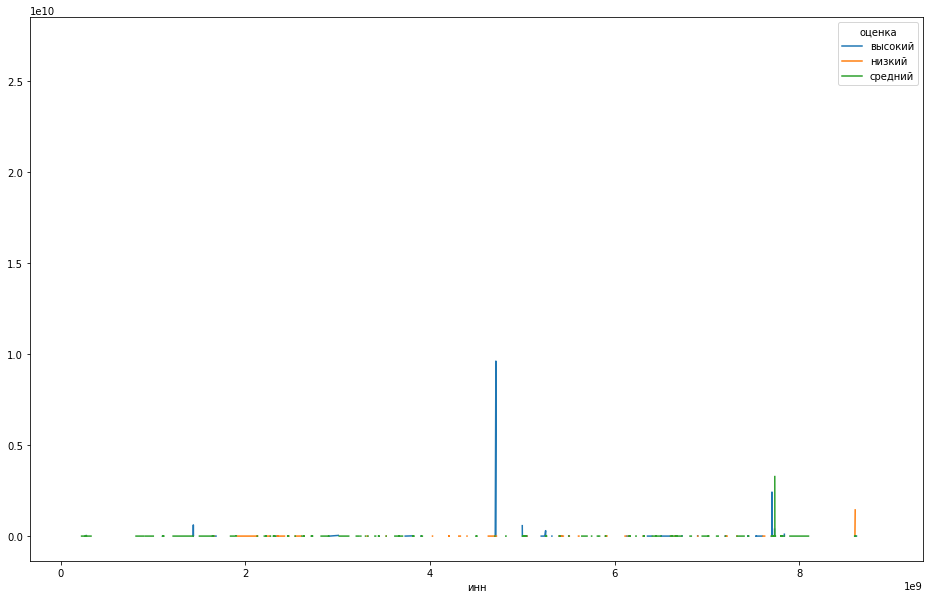

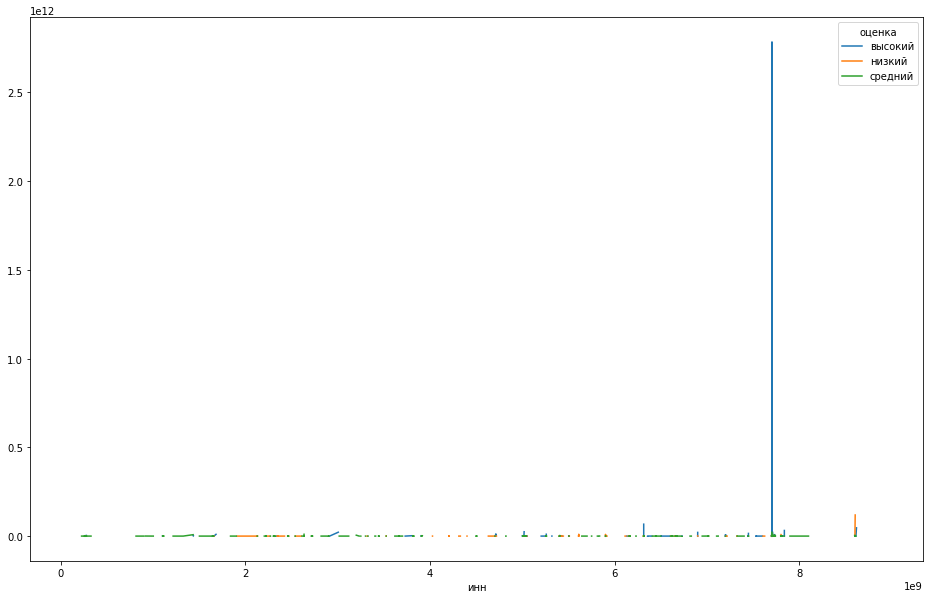

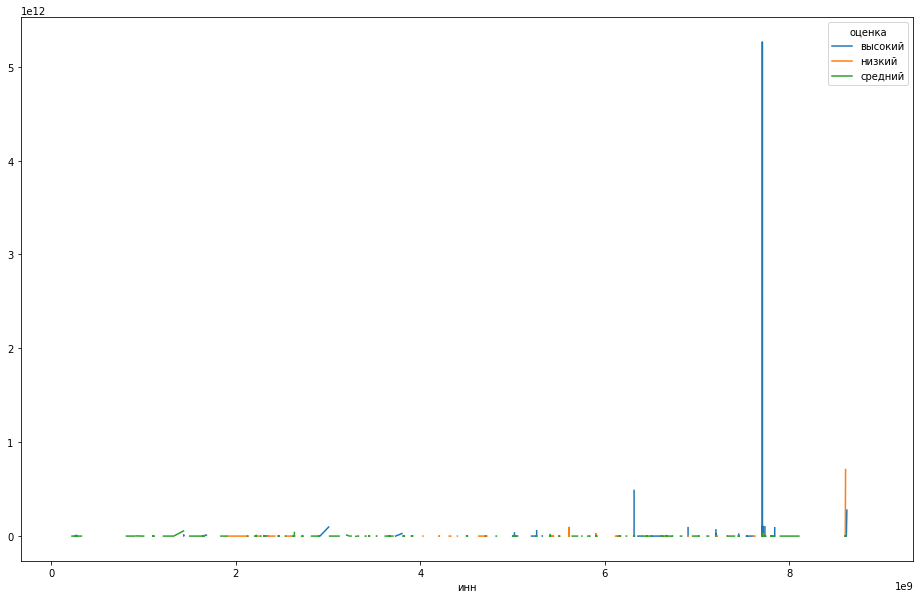

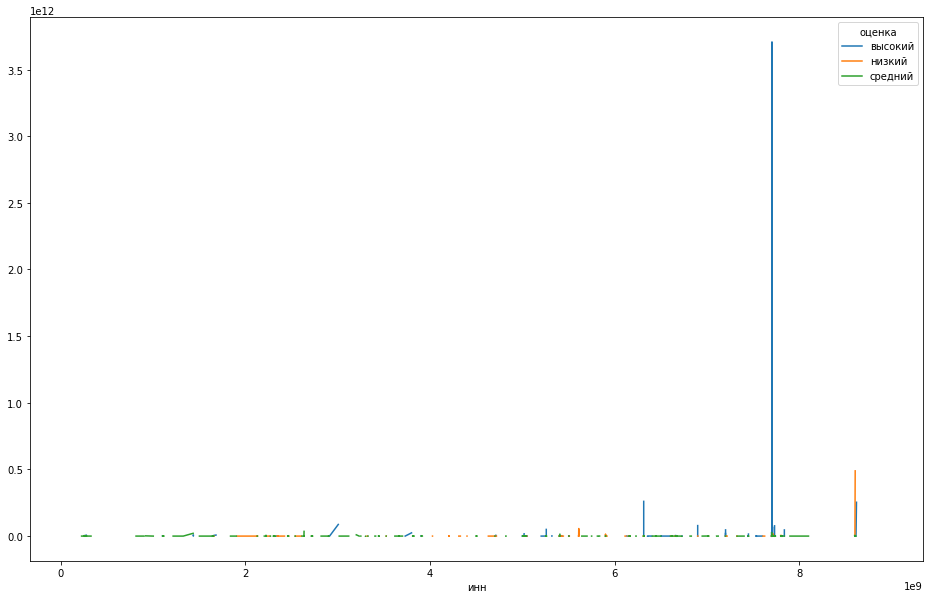

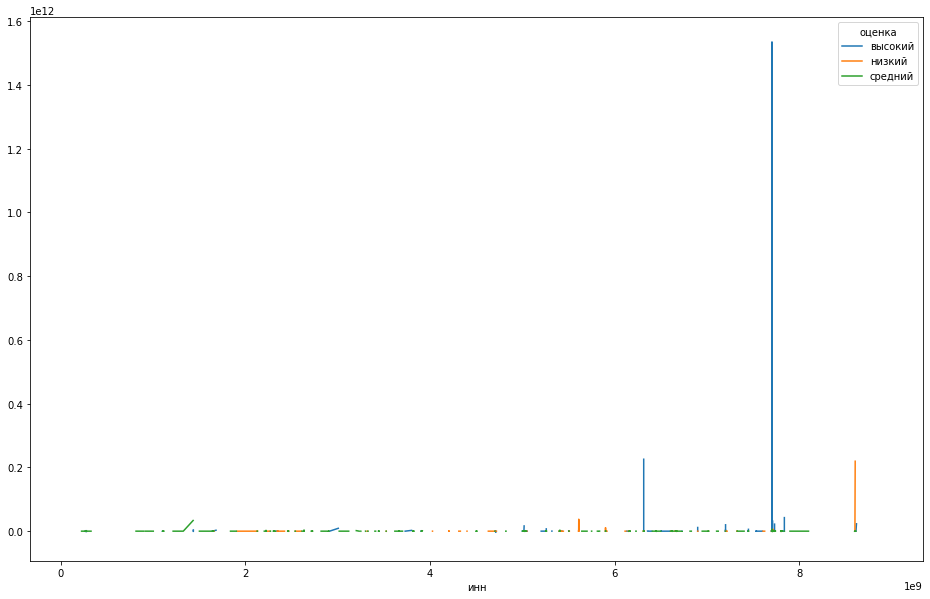

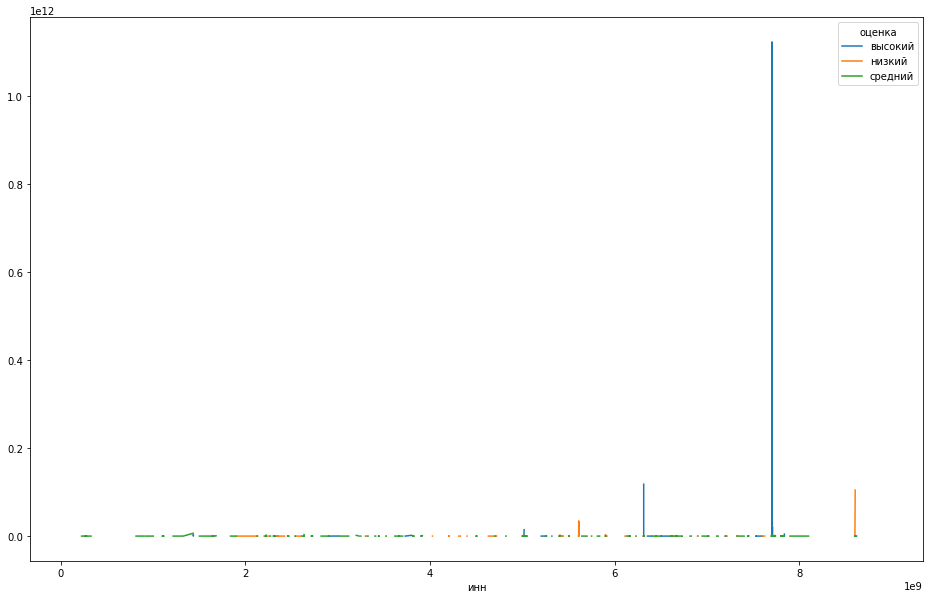

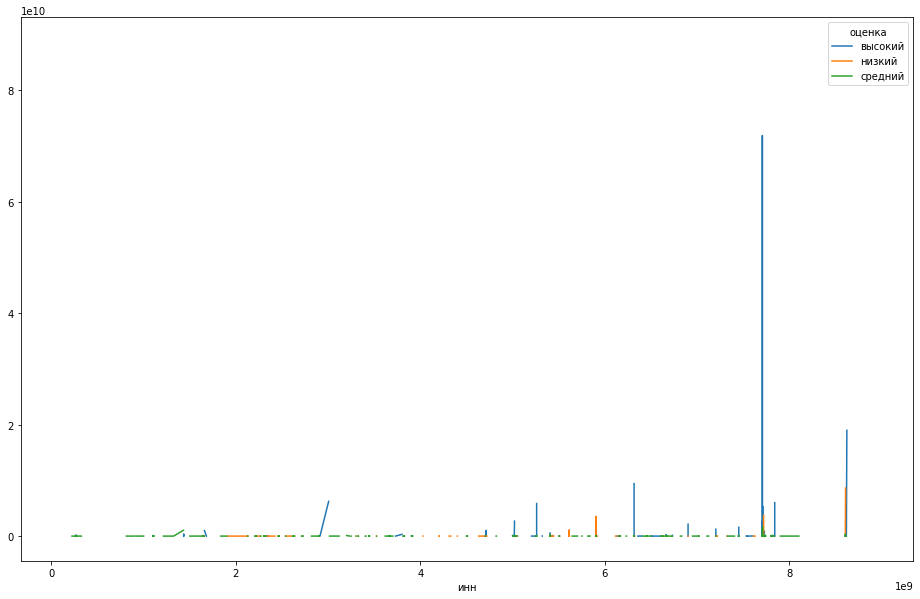

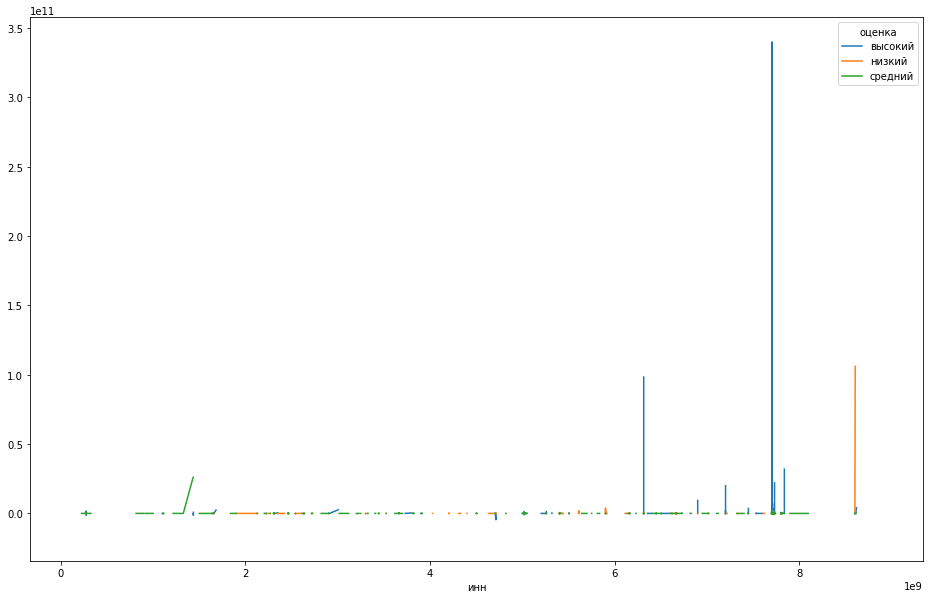

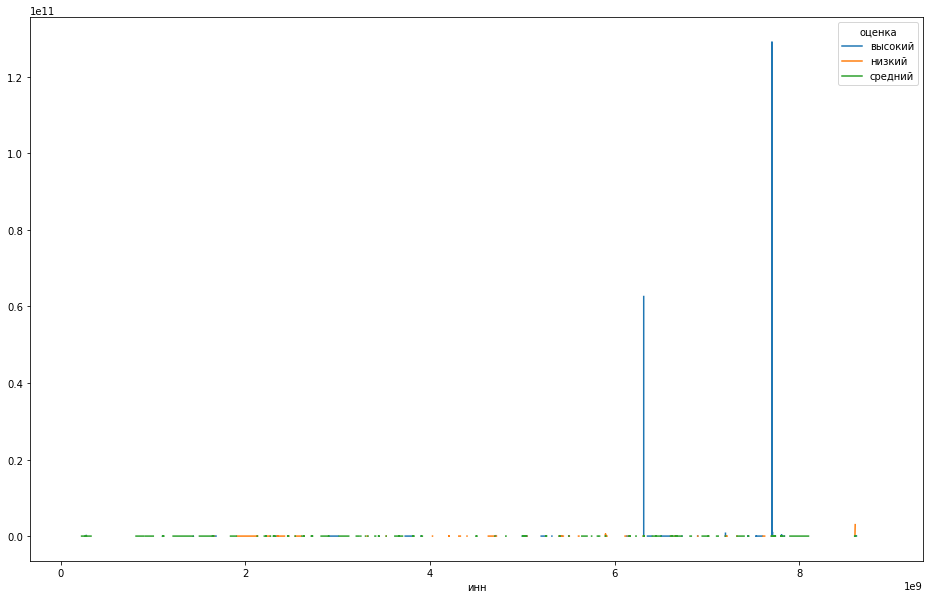

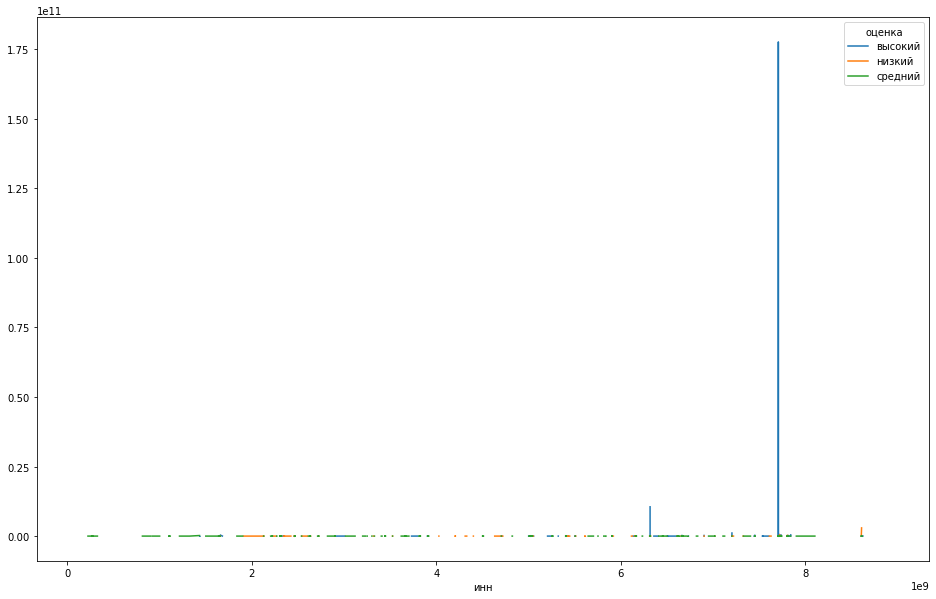

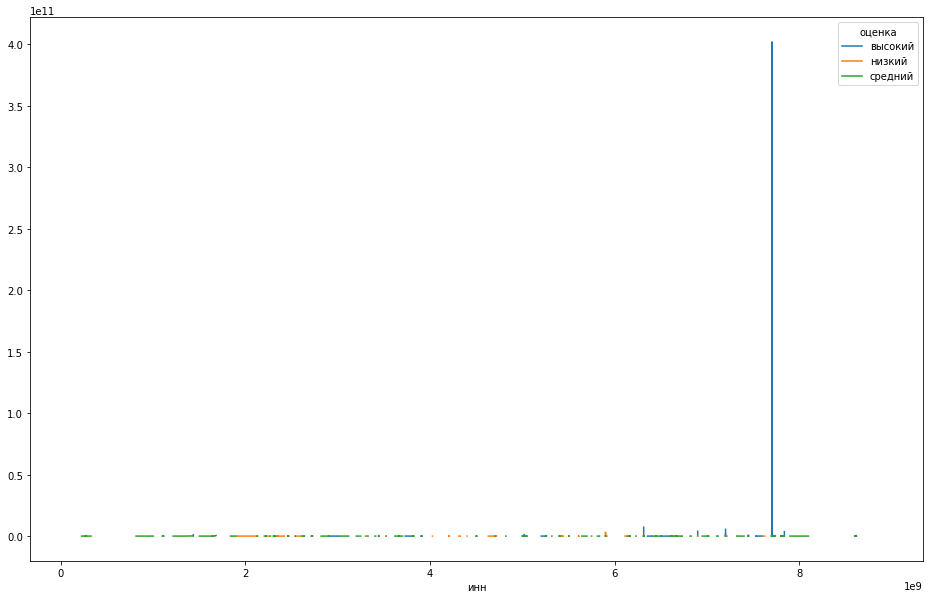

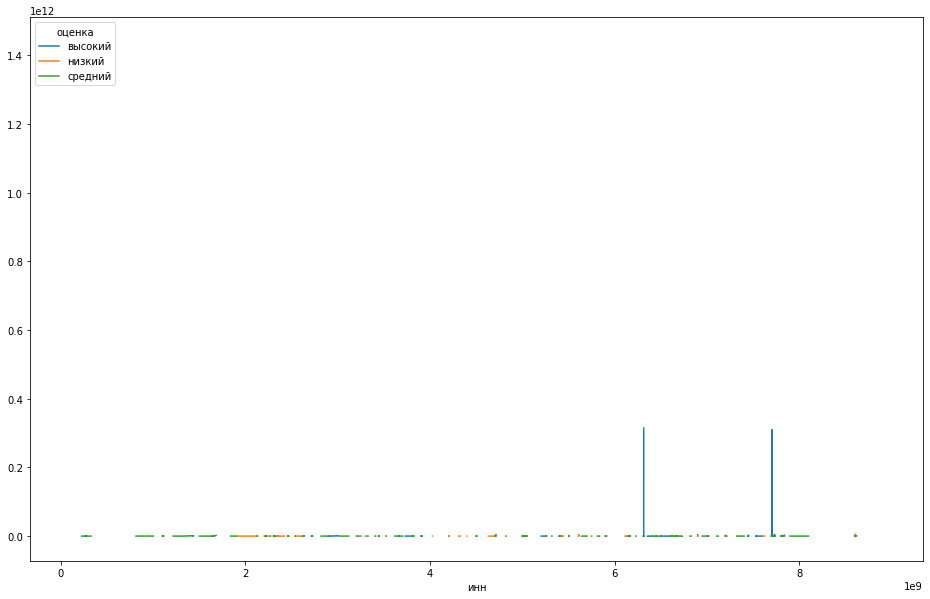

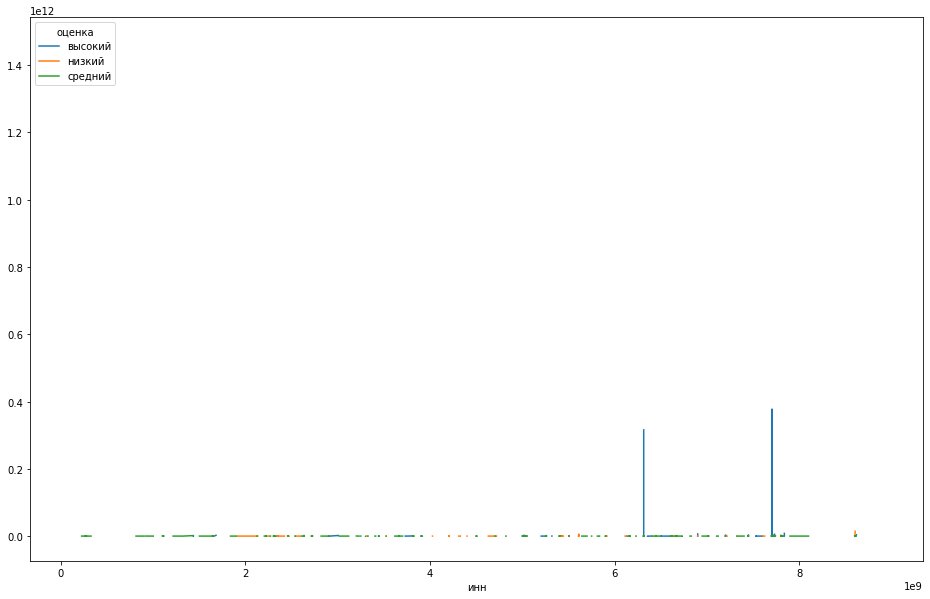

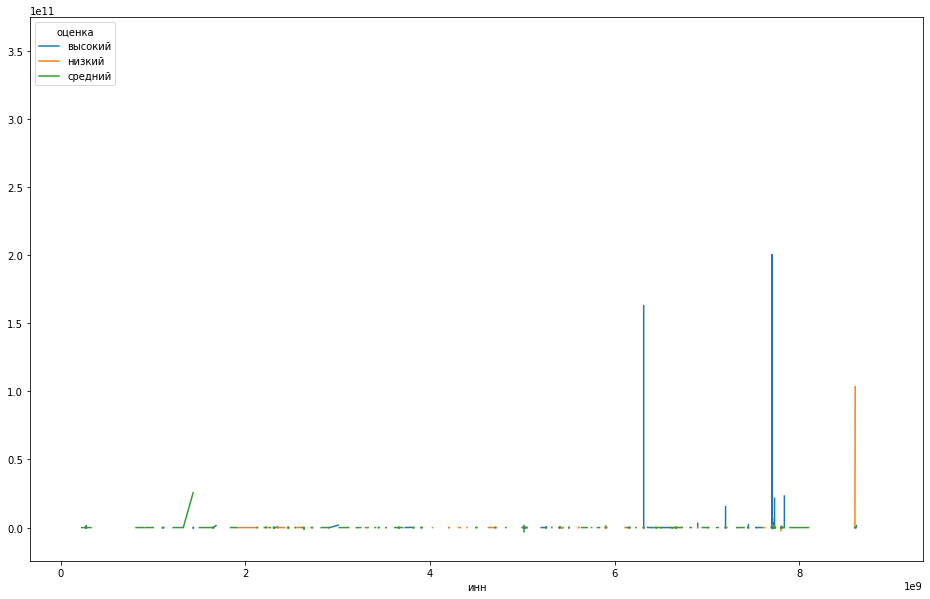

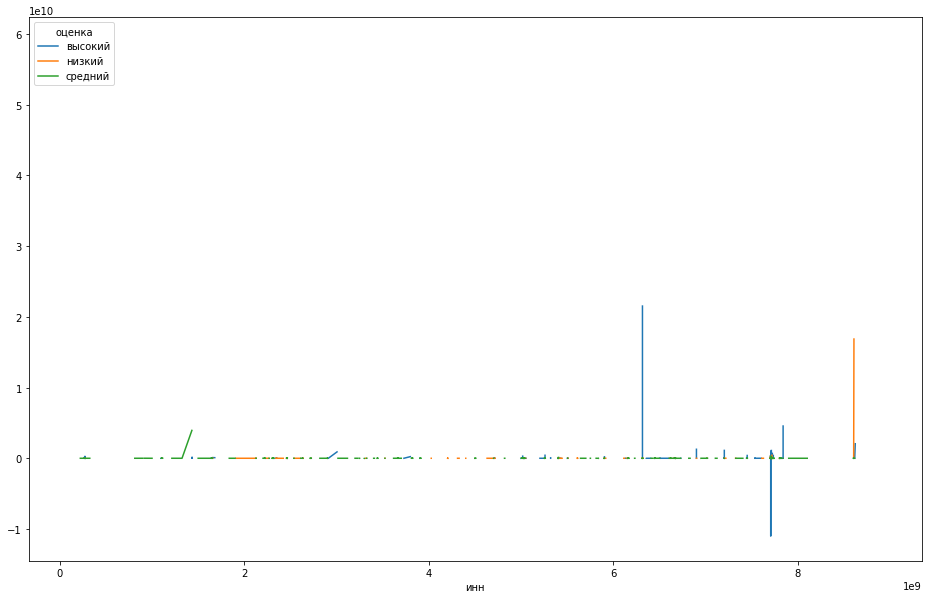

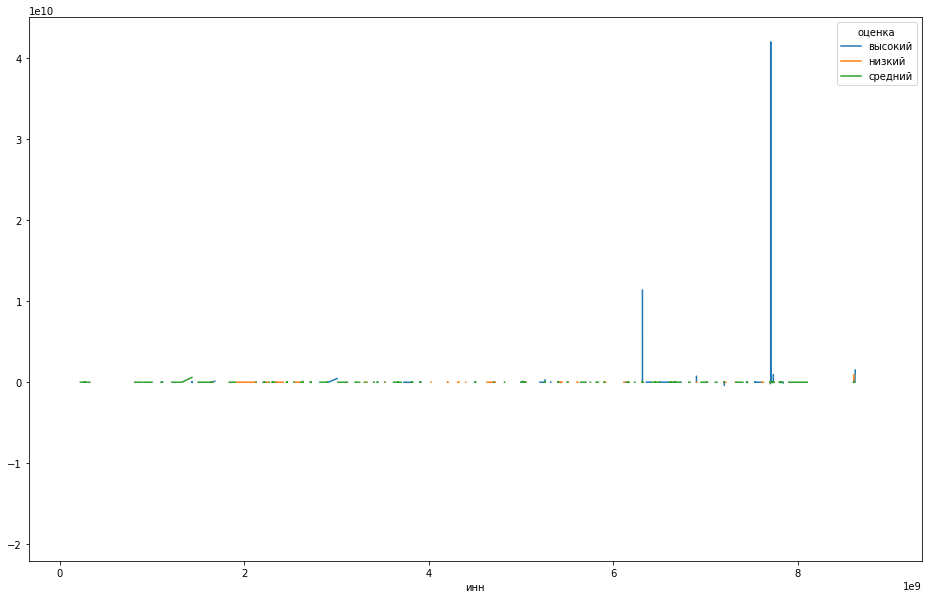

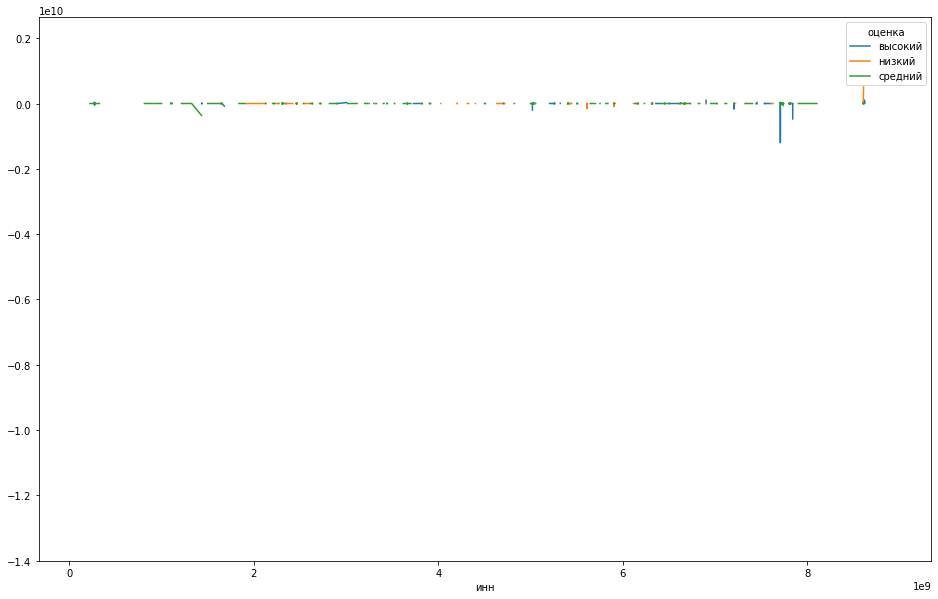

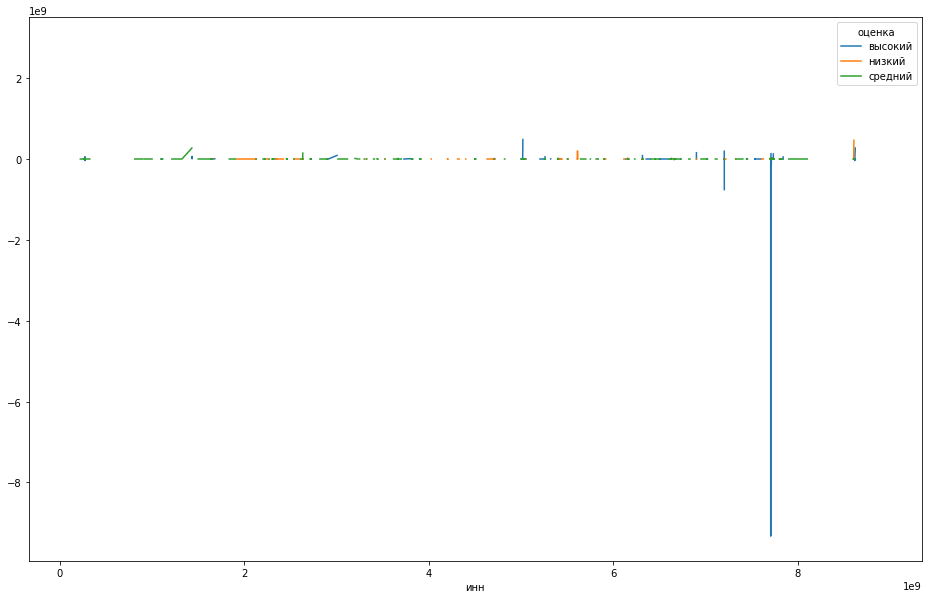

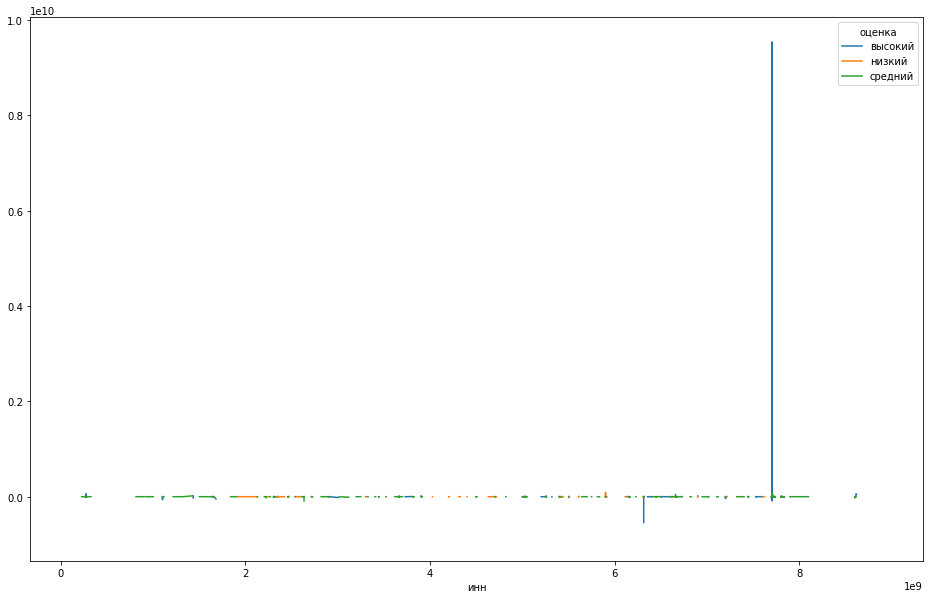

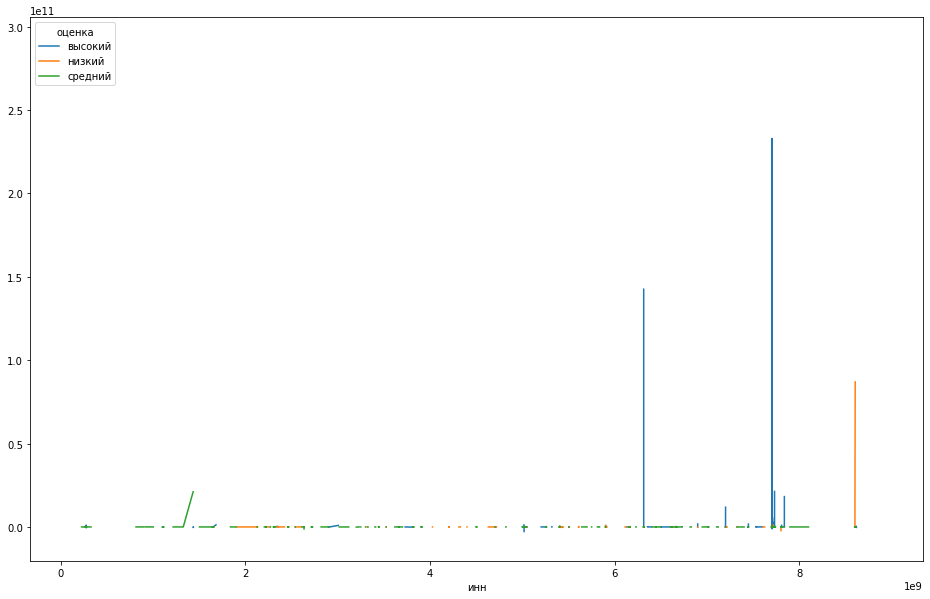

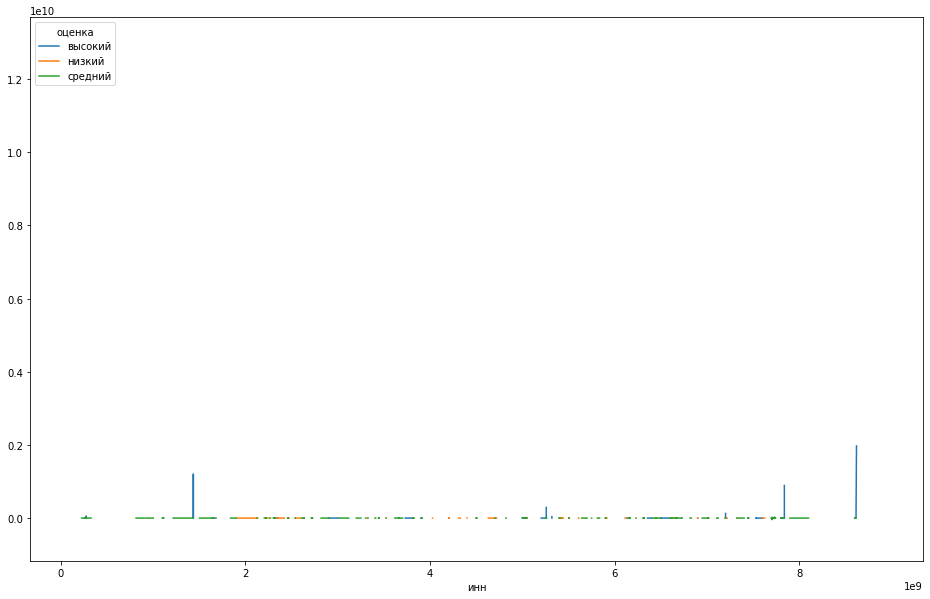

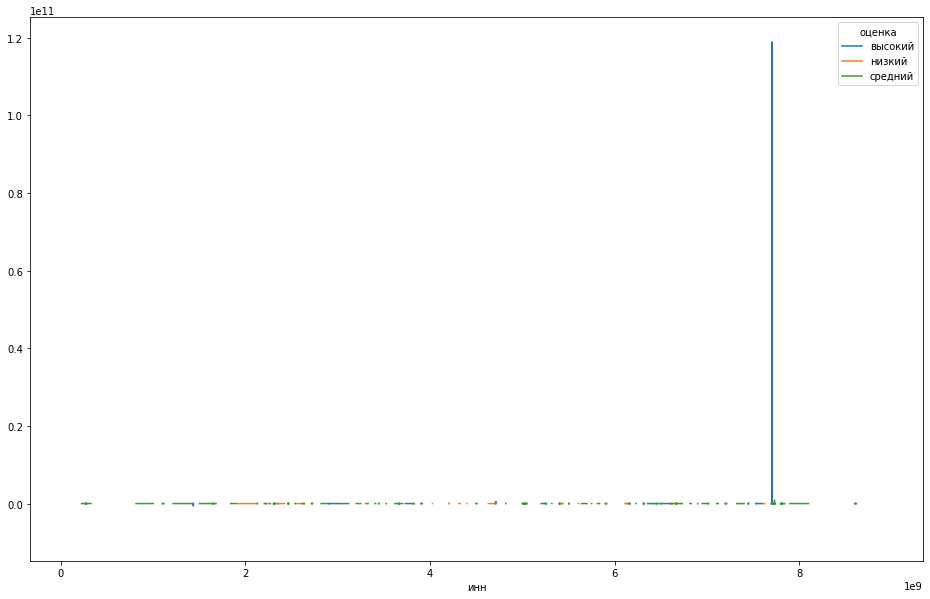

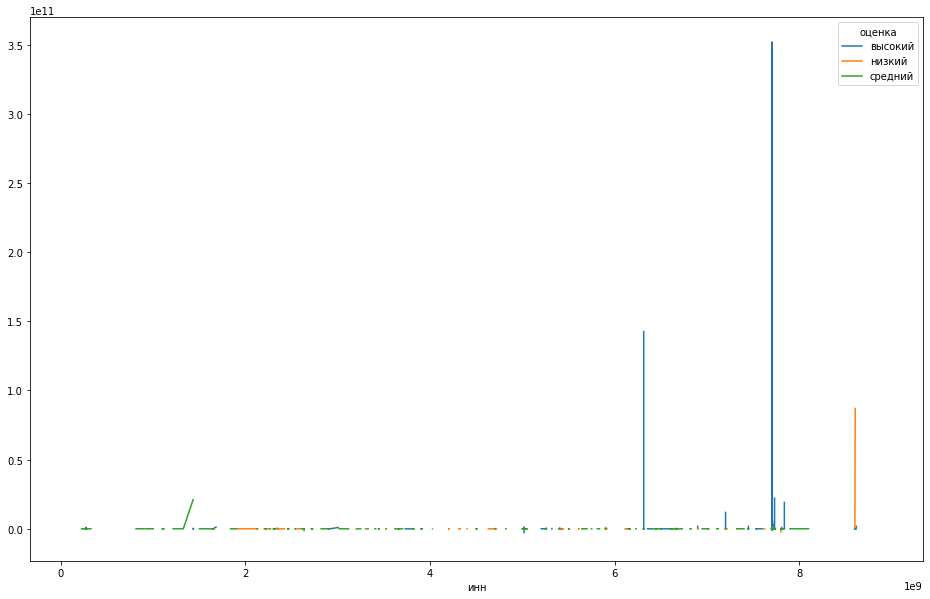

In [55]:
for i in data.columns:
    if i != 'инн' and i != 'год' and i!='оценка' and i!='дата_регистрации' and i!='статус':
        pivoted = pd.pivot_table(data, values=i, columns='оценка', index='инн')
        pivoted.plot(figsize=(16,10))   